In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
%matplotlib inline
sp.init_printing()

In [348]:
# formulation w/ neat latex / greek symbols

f, h, s, ye, psie, w, xk, v, k, dt = sp.symbols("f, h, s, y_e, \psi_e, \omega, x_k, v, \kappa, \delta_t", real=True)
Cv, Tv, Cs, Ts, u_steering, u_acceleration = sp.symbols("C_v, T_v, C_s, T_s, u_\delta, u_a", real=True)
mu_s, mu_g, mu_ax, mu_ay = sp.symbols("\mu_\delta \mu_g, \mu_{a_x}, \mu_{a_y}", real=True)
c = sp.symbols("c", function=True)  # c(s) returns the curvature (1/radius) of the turn at track location s

In [3]:
# source code friendly formulation

f, h, s, ye, psie, w, xk, v, k, dt = sp.symbols("f, h, s, ye, psie, w, xk, v, k, dt", real=True)
Cv, Tv, Cs, Ts, u_steering, u_acceleration = sp.symbols("Cv, Tv, Cs, Ts, u_steering, u_acceleration", real=True)
mu_s, mu_g, mu_ax, mu_ay = sp.symbols("mu_s mu_g mu_ax, mu_ay", real=True)
c = sp.symbols("c", function=True)

In [4]:
f, h, ye, psie, w, xk, v, k, dt

In [5]:
Cv, Tv, Cs, Ts, u_steering, u_acceleration

In [6]:
mu_s, mu_g, mu_ax, mu_ay  # steering and gyroscope bias

In [10]:
# removed s from state
X = sp.Matrix([[ye, psie, w, v, k, Cv, Tv, Cs, Ts, mu_s, mu_g, mu_ax, mu_ay]])
X

[ye  psie  w  v  k  Cv  Tv  Cs  Ts  μ_s  μ_g  μₐₓ  μ_ay]

In [11]:
# dynamic state variables f(x)

eCv, eTv, eCs, eTs = sp.exp(Cv), sp.exp(Tv), sp.exp(Cs), sp.exp(Ts)
fx = sp.Matrix([[
            ye - dt*v * sp.sin(psie),
            psie + dt*(w + v * k * sp.cos(psie) / (1 - k * ye)),
            w + dt*(v*eCs*(u_steering - mu_s) - w) / eTs,
            v + dt*(eCv * u_acceleration - v) / eTv,
            k, Cv, Tv, Cs, Ts, mu_s, mu_g, mu_ax, mu_ay
           ]])
fx.T

⎡           -dt⋅v⋅sin(psie) + ye            ⎤
⎢                                           ⎥
⎢          ⎛k⋅v⋅cos(psie)    ⎞              ⎥
⎢       dt⋅⎜───────────── + w⎟ + psie       ⎥
⎢          ⎝  -k⋅ye + 1      ⎠              ⎥
⎢                                           ⎥
⎢   ⎛                       Cs    ⎞  -Ts    ⎥
⎢dt⋅⎝v⋅(-μ_s + u_steering)⋅ℯ   - w⎠⋅ℯ    + w⎥
⎢                                           ⎥
⎢      ⎛                Cv    ⎞  -Tv        ⎥
⎢   dt⋅⎝u_acceleration⋅ℯ   - v⎠⋅ℯ    + v    ⎥
⎢                                           ⎥
⎢                     k                     ⎥
⎢                                           ⎥
⎢                    Cv                     ⎥
⎢                                           ⎥
⎢                    Tv                     ⎥
⎢                                           ⎥
⎢                    Cs                     ⎥
⎢                                           ⎥
⎢                    Ts                     ⎥
⎢                                 

In [12]:
Fx = sp.simplify(sp.Matrix([sp.diff(fx, Xj) for Xj in X]).T)
Fx

⎡        1                -dt⋅v⋅cos(psie)              0                 -dt⋅s
⎢                                                                             
⎢    2                                                                        
⎢dt⋅k ⋅v⋅cos(psie)  dt⋅k⋅v⋅sin(psie) + k⋅ye - 1                        -dt⋅k⋅c
⎢─────────────────  ───────────────────────────       dt               ───────
⎢             2               k⋅ye - 1                                     k⋅y
⎢   (k⋅ye - 1)                                                                
⎢                                                                             
⎢                                                      -Ts                    
⎢        0                       0               - dt⋅ℯ    + 1  -dt⋅(μ_s - u_s
⎢                                                                             
⎢                                                                             
⎢        0                       0                  

In [13]:
sp.print_python(Fx)

dt = Symbol('dt')
v = Symbol('v')
psie = Symbol('psie')
k = Symbol('k')
ye = Symbol('ye')
Ts = Symbol('Ts')
mu_s = Symbol('mu_s')
u_steering = Symbol('u_steering')
Cs = Symbol('Cs')
w = Symbol('w')
Tv = Symbol('Tv')
u_acceleration = Symbol('u_acceleration')
Cv = Symbol('Cv')
e = ImmutableMatrix([[1, -dt*v*cos(psie), 0, -dt*sin(psie), 0, 0, 0, 0, 0, 0, 0, 0, 0], [dt*k**2*v*cos(psie)/(k*ye - 1)**2, (dt*k*v*sin(psie) + k*ye - 1)/(k*ye - 1), dt, -dt*k*cos(psie)/(k*ye - 1), dt*v*cos(psie)/(k*ye - 1)**2, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, -dt*exp(-Ts) + 1, -dt*(mu_s - u_steering)*exp(Cs - Ts), 0, 0, 0, -dt*v*(mu_s - u_steering)*exp(Cs - Ts), dt*(v*(mu_s - u_steering)*exp(Cs) + w)*exp(-Ts), -dt*v*exp(Cs - Ts), 0, 0, 0], [0, 0, 0, -dt*exp(-Tv) + 1, 0, dt*u_acceleration*exp(Cv - Tv), dt*(-u_acceleration*exp(Cv) + v)*exp(-Tv), 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0

In [25]:
# h
x_cg = sp.symbols("x_CG")
hx = sp.Matrix([
        [(ye - x_cg*sp.tan(psie)) / sp.cos(psie),
         sp.tan(psie),
         -2*k
        ]])  # fitting x = a + by + cy^2
hx.T

⎡-x_CG⋅tan(psie) + ye⎤
⎢────────────────────⎥
⎢     cos(psie)      ⎥
⎢                    ⎥
⎢     tan(psie)      ⎥
⎢                    ⎥
⎣        -2⋅k        ⎦

In [26]:
# H
Hx = sp.simplify(sp.Matrix([sp.diff(hx, Xj) for Xj in X]).T)
sp.print_python(Hx.subs([(psie, "psie"), (ye, "ye")]))
Hx

psie = Symbol('psie')
x_CG = Symbol('x_CG')
ye = Symbol('ye')
e = ImmutableMatrix([[1/cos(psie), (x_CG - 2*x_CG/cos(psie)**2 + ye*tan(psie))/cos(psie), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, cos(psie)**(-2), 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, -2, 0, 0, 0, 0, 0, 0, 0, 0]])


⎡                    2⋅x_CG                                                   
⎢           x_CG - ────────── + ye⋅tan(psie)                                  
⎢                     2                                                       
⎢    1             cos (psie)                                                 
⎢─────────  ────────────────────────────────  0  0  0   0  0  0  0  0  0  0  0
⎢cos(psie)             cos(psie)                                              
⎢                                                                             
⎢                          1                                                  
⎢    0                 ──────────             0  0  0   0  0  0  0  0  0  0  0
⎢                         2                                                   
⎢                      cos (psie)                                             
⎢                                                                             
⎣    0                     0                  0  0  

In [16]:
X

[ye  psie  w  v  k  Cv  Tv  Cs  Ts  μ_s  μ_g  μₐₓ  μ_ay]

In [17]:
# measure gyro_z, accel_x, accel_y
h_imu = sp.Matrix([[
            w + mu_g,
            v*w + mu_ax,
            -(sp.exp(Cv) * u_acceleration - v) / sp.exp(Tv) + mu_ay,
        ]])
h_imu.T

⎡               μ_g + w                ⎤
⎢                                      ⎥
⎢              μₐₓ + v⋅w               ⎥
⎢                                      ⎥
⎢       ⎛                  Cv    ⎞  -Tv⎥
⎣μ_ay + ⎝- u_acceleration⋅ℯ   + v⎠⋅ℯ   ⎦

In [18]:
H_imu = sp.simplify(sp.Matrix([sp.diff(h_imu, Xj) for Xj in X]).T)
H_imu

⎡0  0  1   0    0             0                            0                0 
⎢                                                                             
⎢0  0  v   w    0             0                            0                0 
⎢                                                                             
⎢          -Tv                      Cv - Tv  ⎛                Cv    ⎞  -Tv    
⎣0  0  0  ℯ     0  -u_acceleration⋅ℯ         ⎝u_acceleration⋅ℯ   - v⎠⋅ℯ     0 

 0  0  1  0  0⎤
              ⎥
 0  0  0  1  0⎥
              ⎥
              ⎥
 0  0  0  0  1⎦

In [19]:
sp.print_python(H_imu)

v = Symbol('v')
w = Symbol('w')
Tv = Symbol('Tv')
u_acceleration = Symbol('u_acceleration')
Cv = Symbol('Cv')
e = ImmutableMatrix([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, v, w, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, exp(-Tv), 0, -u_acceleration*exp(Cv - Tv), (u_acceleration*exp(Cv) - v)*exp(-Tv), 0, 0, 0, 0, 0, 1]])


In [409]:
h_s = sp.Matrix([[s, k]])
H_s = sp.simplify(sp.Matrix([sp.diff(h_s, Xj) for Xj in X]).T)
sp.print_python(H_s)
H_s

e = ImmutableMatrix([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])


⎡1  0  0  0  0  0  0  0  0  0  0  0  0  0⎤
⎢                                        ⎥
⎣0  0  0  0  0  1  0  0  0  0  0  0  0  0⎦

In [ ]:
# so S is just P[0,0] + variance(s)
# which means K is the left column of P (P H.T) divided by P[0,0] + variance(s)
# so as our estimate of s is refined, everything else is affected too by the covariance in P.

In [332]:
H_s * Fx.T * Fx * H_s.T

⎡                                 dt⋅v⋅ye⋅cos(psie)              ⎤
⎢        1                        ─────────────────              ⎥
⎢                                              2                 ⎥
⎢                                    (k⋅ye - 1)                  ⎥
⎢                                                                ⎥
⎢                     2  2   2    2           2  2    2          ⎥
⎢dt⋅v⋅ye⋅cos(psie)  dt ⋅v ⋅ye ⋅cos (psie)   dt ⋅v ⋅cos (psie)    ⎥
⎢─────────────────  ───────────────────── + ───────────────── + 1⎥
⎢             2                    4                     4       ⎥
⎣   (k⋅ye - 1)           (k⋅ye - 1)            (k⋅ye - 1)        ⎦

In [377]:
# regression on curve given pixels
px, c = sp.symbols("p_x, c", complex=True)
p = (-ye*sp.exp(sp.I*psie) - sp.I/k * sp.exp(sp.I*psie) * (sp.exp(sp.I*k*s) - 1))
(p - px)**2

In [376]:
sp.simplify(sp.Matrix([sp.diff((p - px)**2, x) for x in [k, psie, ye, s]]))

⎡   ⎛       ⎛         ⅈ⋅\psiₑ⎞     ⎛ ⅈ⋅\kappa⋅s    ⎞  ⅈ⋅\psiₑ⎞ ⎛          ⅈ⋅(\
⎢-2⋅⎝\kappa⋅⎝pₓ + yₑ⋅ℯ       ⎠ + ⅈ⋅⎝ℯ           - 1⎠⋅ℯ       ⎠⋅⎝\kappa⋅s⋅ℯ    
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                 3           
⎢                                                           \kappa            
⎢                                                                             
⎢              ⎛       ⎛         ⅈ⋅\psiₑ⎞     ⎛ ⅈ⋅\kappa⋅s    ⎞  ⅈ⋅\psiₑ⎞ ⎛   
⎢            2⋅⎝\kappa⋅⎝pₓ + yₑ⋅ℯ       ⎠ + ⅈ⋅⎝ℯ           - 1⎠⋅ℯ       ⎠⋅⎝ⅈ⋅\
⎢            ─────────────────────────────────────────────────────────────────
⎢                                                                 2           
⎢                                                           \kappa            
⎢                                                                             
⎢                              ⎛       ⎛         ⅈ⋅\

In [385]:
px, c = sp.symbols("p_x, c", complex=True)
thetax = sp.symbols('\\theta_x', real=True)

(px - c + sp.exp(sp.I * thetax) / k)**2

In [391]:
(sp.Matrix([sp.diff((px - c + sp.exp(sp.I * thetax) / k)**2, x) for x in [c, px, thetax, k]]))

⎡                      ⅈ⋅\thetaₓ      ⎤
⎢                   2⋅ℯ               ⎥
⎢      2⋅c - 2⋅pₓ - ────────────      ⎥
⎢                      \kappa         ⎥
⎢                                     ⎥
⎢                      ⅈ⋅\thetaₓ      ⎥
⎢                   2⋅ℯ               ⎥
⎢     -2⋅c + 2⋅pₓ + ────────────      ⎥
⎢                      \kappa         ⎥
⎢                                     ⎥
⎢    ⎛           ⅈ⋅\thetaₓ⎞           ⎥
⎢    ⎜          ℯ         ⎟  ⅈ⋅\thetaₓ⎥
⎢2⋅ⅈ⋅⎜-c + pₓ + ──────────⎟⋅ℯ         ⎥
⎢    ⎝            \kappa  ⎠           ⎥
⎢─────────────────────────────────────⎥
⎢                \kappa               ⎥
⎢                                     ⎥
⎢   ⎛           ⅈ⋅\thetaₓ⎞            ⎥
⎢   ⎜          ℯ         ⎟  ⅈ⋅\thetaₓ ⎥
⎢-2⋅⎜-c + pₓ + ──────────⎟⋅ℯ          ⎥
⎢   ⎝            \kappa  ⎠            ⎥
⎢─────────────────────────────────────⎥
⎢                     2               ⎥
⎣               \kappa                ⎦

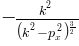

In [421]:
sp.simplify(sp.diff(sp.sqrt(k**2 - px**2), px, px))

In [426]:
# -> -1/r. ok. confirmed.